## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
# import data
df = pd.read_excel('titanic.xlsx')
# cek 5 data teratas
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


### **Eksplorasi & Memahami Data**

In [4]:
# cek 5 data terbawah
df.tail()

,survived,name,sex,age
495,1,"Mallet, Mrs. Albert (Antoinette Magnin)",female,24.0
496,0,"Mangiavacchi, Mr. Serafino Emilio",male,NaN
497,0,"Matthews, Mr. William John",male,30.0
498,0,"Maybery, Mr. Frank Hubert",male,40.0
499,0,"McCrae, Mr. Arthur Gordon",male,32.0


In [5]:
# mengecek 5 data random sebagai sample data
df.sample(5)

,survived,name,sex,age
341,1,"Becker, Miss. Ruth Elizabeth",female,12.0
437,1,"Hart, Mrs. Benjamin (Esther Ada Bloomfield)",female,45.0
292,1,"Taylor, Mr. Elmer Zebley",male,48.0
36,1,"Bowerman, Miss. Elsie Edith",female,22.0
438,1,"Herman, Miss. Alice",female,24.0


**Observation result**
**Setelah melakukan eksplorasi awal menggunakan fungsi .head(), .tail(), dan .sample(), saya memperoleh beberapa temuan menarik terkait struktur dan isi dari dataset Titanic. Berikut adalah hasil observasi yang saya lakukan:**
1. Kolom Survived
Kolom ini tampaknya bersifat biner, dengan hanya dua kemungkinan nilai: 0 dan 1. Hal ini menunjukkan dua kondisi berbeda, yaitu penumpang yang tidak selamat (0) dan yang selamat (1). Kolom ini akan sangat penting sebagai variabel target jika dilakukan analisis klasifikasi.


2. Kolom Sex
Sama seperti kolom Survived, kolom ini juga hanya memiliki dua kategori: male dan female. Artinya, jenis kelamin dalam dataset ini direpresentasikan secara eksplisit dan sederhana, yang bisa mempermudah proses encoding pada tahap preprocessing.


3. Kolom Age
Kolom Age bertipe data float. Meskipun sebagian besar nilai dalam kolom ini terlihat berupa bilangan bulat, terdapat beberapa kasus dengan nilai desimal, seperti pada indeks ke-1 yang menunjukkan usia 0.9. Ini mengindikasikan bahwa tipe float digunakan untuk merepresentasikan umur bayi yang belum genap satu tahun. Secara umum, pendekatan ini cukup logis untuk memberikan informasi usia yang lebih akurat.


4. Kolom Name
Kolom Name cukup menarik untuk dianalisis lebih lanjut karena memuat title (gelar sosial) dari setiap penumpang, seperti Mr, Miss, Mrs, Master, dan sebagainya. Dari pengamatan awal, keberadaan title ini membuka kemungkinan untuk menghasilkan beberapa insight tambahan, antara lain:

    *   Perkiraan umur
Berdasarkan pengamatan awal, kolom Age memiliki cukup banyak nilai kosong (null). Dengan memanfaatkan title, kita dapat memperkirakan rentang umur seseorang, misalnya Master cenderung merujuk pada anak laki-laki, sedangkan Mrs biasanya digunakan oleh wanita yang telah menikah. Ini dapat menjadi dasar untuk mengisi nilai umur yang hilang secara lebih logis dan akurat.

    *  Status Pernikahan
Beberapa title juga bisa memberikan gambaran tentang status pernikahan. Misalnya, Miss biasanya mengacu pada wanita yang belum menikah, sementara Mrs menunjukkan wanita yang telah menikah. Meskipun tidak menjadi variabel utama, informasi ini bisa menjadi insight tambahan yang berguna pada tahap analisis lanjutan.

    *  Status Sosial atau Profesi
Beberapa title langka, seperti Dr, Rev, atau Col, bisa menunjukkan profesi tertentu atau bahkan status sosial yang lebih tinggi. Hal ini menarik untuk dikaji lebih lanjut, karena bisa jadi terdapat korelasi antara status sosial dan kemungkinan untuk selamat dalam insiden Titanic. Ini tentu akan diuji pada tahap analisis lanjutan.










In [6]:
# Dalam proses eksplorasi data, saya membuat kolom baru bernama ‘Title’ yang diambil dari bagian tengah pada kolom ‘Name’,
# yaitu gelar atau sapaan seperti Mr., Miss., Mrs., Master., dan sebagainya.

df['title'] = df['name'].str.extract('([A-Za-z]+)\.')

*Pembuatan kolom ini bertujuan untuk menambah konteks sosial dan demografis dari setiap penumpang. Salah satu manfaat utama dari keberadaan kolom ini adalah untuk membantu proses imputasi nilai usia yang hilang. Dengan menggunakan median usia dari masing-masing title, proses pengisian nilai yang hilang pada kolom ‘Age’ menjadi lebih relevan dan masuk akal.*

*Selain itu, informasi dalam kolom title juga bisa membuka potensi insight tambahan seperti status pernikahan (Miss vs Mrs) atau bahkan kemungkinan pengaruh status sosial terhadap peluang keselamatan penumpang (yang mungkin bisa dieksplorasi lebih lanjut).*

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
 4   title     500 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 19.7+ KB


**Observation Result**

1.   Set data ini terdiri dari 500 baris dan 4 kolom.
2.   Dari hasil pengecekan awal, diketahui bahwa hanya kolom `age` yang mengandung nilai missing.



In [8]:
print(df.columns)
# Dengan mengkategorikan data ke bentuk tipenya masing masing
# ini akana memudahkan kita dalam menganalisis data tersebut secara terpisah dan dengan lebih mudah
categoricals = ['name', 'sex', 'title']

numericals = ['survived', 'age']

Index(['survived', 'name', 'sex', 'age', 'title'], dtype='object')


In [9]:
# Syntax numerical statistical summary
df[numericals].describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


**Observation Result**


1. Observasi Kolom Survived
Kolom Survived bersifat biner, yang artinya hanya memiliki dua nilai: 0 dan 1. Nilai 0 menunjukkan bahwa penumpang tidak selamat, sedangkan nilai 1 menunjukkan bahwa penumpang selamat. Karena bersifat biner dan tidak mengandung nilai lain, kolom ini sudah cukup jelas dan tidak memerlukan banyak penjelasan tambahan dalam konteks pemahaman struktur datanya.


2. Observasi Kolom Age
Distribusi pada kolom Age tampak cukup simetris. Nilai mean dan median berada dalam rentang yang sangat berdekatan, yang mengindikasikan distribusi yang tidak terlalu condong ke salah satu sisi (tidak terlalu skewed). Meskipun standar deviasi pada kolom ini cukup besar, nilai tersebut masih dalam batas yang wajar dan tidak menunjukkan adanya penyebaran ekstrem yang signifikan.



In [10]:
df[categoricals].describe()

,name,sex,title
count,500,500,500
unique,499,2,17
top,"Eustis, Miss. Elizabeth Mussey",male,Mr
freq,2,288,256


**Observation Result**

1. Kolom `title` memiliki total 17 nilai unik (variasi), dengan modus adalah 'Mr' yang muncul sebanyak 256 kali. Hal ini menunjukkan bahwa mayoritas penumpang berjenis kelamin laki-laki dan menggunakan gelar formal tersebut.


2. Kolom `sex` hanya memiliki dua nilai unik, yaitu 'male' dan 'female', dengan 'male' sebagai nilai yang paling sering muncul sebanyak 288 kali. Ini memperkuat temuan sebelumnya bahwa sebagian besar penumpang adalah laki-laki.


3. Kolom `name` secara logis seharusnya bersifat unik karena terdiri dari nama lengkap dan gelar. Namun, berdasarkan data, terdapat frekuensi tertinggi sebesar 2 untuk satu nama, yang mengindikasikan adanya satu duplikat pada kolom ini. Hal ini perlu ditindaklanjuti lebih lanjut untuk memastikan apakah benar terjadi duplikasi data atau hanya kebetulan penamaan yang sama.

In [11]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(df[col].value_counts(), '\n')

Value counts of name column
name
Eustis, Miss. Elizabeth Mussey                                                        2
Becker, Miss. Ruth Elizabeth                                                          1
Becker, Miss. Marion Louise                                                           1
Becker, Master. Richard F                                                             1
Beauchamp, Mr. Henry James                                                            1
Beane, Mrs. Edward (Ethel Clarke)                                                     1
Beane, Mr. Edward                                                                     1
Bateman, Rev. Robert James                                                            1
Banfield, Mr. Frederick James                                                         1
Ball, Mrs. (Ada E Hall)                                                               1
Baimbrigge, Mr. Charles Robert                                                        1

In [12]:
for col in numericals:
  print(f"==== {col} ====")
  print(df[col].value_counts(), '\n')

==== survived ====
survived
1    270
0    230
Name: count, dtype: int64 

==== age ====
age
24.0000    23
30.0000    20
36.0000    19
18.0000    14
42.0000    14
45.0000    14
35.0000    14
22.0000    12
28.0000    12
23.0000    11
21.0000    11
31.0000    11
48.0000    11
25.0000    11
29.0000    10
54.0000    10
50.0000    10
34.0000    10
47.0000    10
39.0000     9
27.0000     9
33.0000     8
49.0000     8
38.0000     8
19.0000     8
40.0000     8
55.0000     8
32.0000     7
60.0000     7
17.0000     7
26.0000     7
44.0000     6
52.0000     6
37.0000     6
58.0000     6
64.0000     5
46.0000     5
57.0000     5
51.0000     5
16.0000     4
53.0000     4
56.0000     4
43.0000     4
62.0000     4
61.0000     4
1.0000      3
8.0000      3
63.0000     3
41.0000     3
15.0000     2
71.0000     2
20.0000     2
65.0000     2
4.0000      2
6.0000      2
2.0000      1
0.9167      1
14.0000     1
11.0000     1
76.0000     1
59.0000     1
80.0000     1
28.5000     1
32.5000     1
70.0000     

###**Eksplorasi: Apakah Gelar Mempengaruhi Peluang Keselamatan?**

Penjelasan:

Salah satu fitur menarik dalam dataset ini adalah kolom title, yang diambil dari nama lengkap penumpang. Gelar seperti Mr, Mrs, Miss, Master, dan sebagainya tidak hanya mencerminkan jenis kelamin, tetapi juga dapat memberi gambaran tentang usia, status sosial, dan bahkan status pernikahan. Oleh karena itu, eksplorasi ini dilakukan untuk menguji apakah terdapat hubungan antara gelar yang dimiliki penumpang dengan peluang mereka untuk selamat dalam tragedi Titanic.
Tujuan dari analisis ini adalah untuk mengetahui apakah terdapat privilege atau kecenderungan tertentu yang berkaitan dengan gelar, terutama dalam konteks prioritas penyelamatan.


          Total Penumpang  Jumlah Selamat  Persentase Selamat (%)
title                                                            
Countess                1             1.0              100.000000
Lady                    1             1.0              100.000000
Dona                    1             1.0              100.000000
Mlle                    2             2.0              100.000000
Master                 11            11.0              100.000000
Sir                     1             1.0              100.000000
Mme                     1             1.0              100.000000
Miss                   88            83.0               94.318182
Mrs                   116           106.0               91.379310
Dr                      6             4.0               66.666667
Col                     4             2.0               50.000000
Major                   2             1.0               50.000000
Mr                    256            55.0               21.484375
Capt      

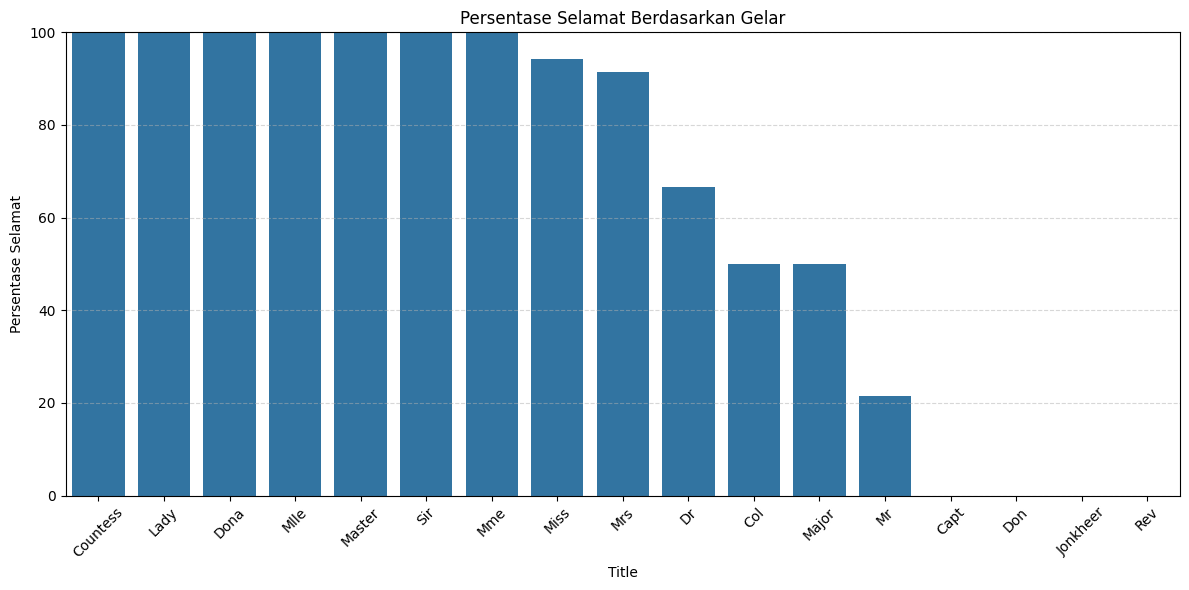

In [28]:
# Step 1: Hitung total jumlah penumpang per title# Ini nge-group data berdasarkan kolom 'title', lalu hitung berapa baris (orang) di setiap title
jumlah_penumpang = df.groupby('title').size()
# Step 2: Hitung jumlah penumpang yang selamat per title# Di sini kita filter dulu yang survived == 1 (artinya selamat)
# Lalu kita group lagi berdasarkan title dan hitung jumlahnya
jumlah_selamat = df[df['survived'] == 1].groupby('title').size()
# Step 3: Gabungkan kedua informasi di atas ke dalam 1 DataFrame
# Tujuannya biar kita bisa lihat side by side, berapa total penumpang dan berapa yang selamat per title
# Gunakan pd.concat agar bisa gabung 2 series jadi 1 DataFrame
df_title = pd.concat([jumlah_penumpang, jumlah_selamat], axis=1)
# Step 4: Kasih nama kolom yang jelas untuk dibaca# Karena hasil concat tadi belum ada nama kolomnya
df_title.columns = ['Total Penumpang', 'Jumlah Selamat']
# Step 5: Hitung survival rate (persentase selamat)
# Formula: jumlah selamat dibagi total penumpang, dikali 100 biar jadi persen
df_title['Persentase Selamat (%)'] = (df_title['Jumlah Selamat'] / df_title['Total Penumpang']) * 100
# Step 6: Tampilkan DataFrame hasil akhir
# Ini akan menampilkan data dalam bentuk tabel yang enak dibaca
print(df_title.sort_values('Persentase Selamat (%)', ascending=False))

# visualisasi
df_title_reset = df_title.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_title_reset.sort_values('Persentase Selamat (%)', ascending=False), x='title', y='Persentase Selamat (%)')
plt.title('Persentase Selamat Berdasarkan Gelar')
plt.xlabel('Title')
plt.ylabel('Persentase Selamat')
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Kesimpulan:

Berdasarkan hasil analisis, terlihat bahwa beberapa gelar memiliki tingkat keselamatan (survival rate) yang lebih tinggi dibandingkan yang lain. Misalnya, gelar seperti Mrs dan Miss menunjukkan kemungkinan besar bahwa perempuan mendapatkan prioritas dalam proses evakuasi. Sementara itu, gelar seperti Mr memiliki tingkat keselamatan yang lebih rendah, menunjukkan bahwa laki-laki dewasa mungkin tidak termasuk prioritas utama.

Selain itu, gelar-gelar tertentu yang lebih langka seperti Dr, Col, atau Rev dapat dianalisis lebih lanjut untuk melihat apakah status sosial juga memiliki pengaruh. Namun, perlu diingat bahwa jumlah sampel untuk gelar-gelar ini kecil, sehingga perlu kehati-hatian dalam interpretasi.


## Duplicates Handling

In [14]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

0.998

In [15]:
# menampilkan semua row yang duplicate
duplicates = df[df.duplicated(keep=False)]
duplicates

,survived,name,sex,age,title
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,Miss
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,Miss


In [16]:
# Langkah 2: Hitung frekuensi kemunculan tiap baris duplikat
duplicate_counts = duplicates.groupby(list(df.columns)).size().reset_index(name='jumlah_duplikat')

# Langkah 3: Urutkan berdasarkan jumlah duplikat
sorted_duplicates = duplicate_counts.sort_values(by='jumlah_duplikat', ascending=False)

# Tampilkan hasil
print("Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:")
sorted_duplicates

Baris duplikat yang sudah diurutkan berdasarkan jumlah kemunculannya:


,survived,name,sex,age,title,jumlah_duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,Miss,2


In [17]:
#Handling Drop duplicate
df = df.drop_duplicates()

dengan state ini maka hasilnya dimasukan ke df yang asli

In [18]:
len(df.drop_duplicates()) / len(df)
#jika output dari code di cell ini tidak bernilai 1 maka terdapat duplikat

1.0

## Missing Value Handling

In [19]:
# cek apakah ada missing value
df.isna().sum()

,0
survived,0
name,0
sex,0
age,49
title,0


In [20]:
# cek persentase row yang null

# memasukan variable total rows
total_rows = len(df)
# melakukan looping untuk mengecek semua persentase missing value di setiap kolom yang ada
for column in df.columns:
  # membuat variable untuk menghitung berapa total missing value yang ada
  missing_count = df[column].isna().sum()
  # memasukan variable kedalam rumus persentase
  missing_percentage = (missing_count / total_rows) * 100
  print(f"Column '{column}' Has {missing_count} missing values ({missing_percentage:.2f}%)") # .2f means 2 decimal

Column 'survived' Has 0 missing values (0.00%)
Column 'name' Has 0 missing values (0.00%)
Column 'sex' Has 0 missing values (0.00%)
Column 'age' Has 49 missing values (9.82%)
Column 'title' Has 0 missing values (0.00%)


**Report**

1.  Missing value yang ada di kolom age kurang dari 20%, maka missing value ini akan diatasi tanpa dihapus kolom tersebut

**Untuk mengatasi missing value ini, saya memilih untuk menggunakan imputasi, namun imputasinya tidak dilakukan secara asal (misalnya menggunakan median keseluruhan), melainkaan berdasarkan title dari masing masing individu **

In [21]:
# Mendefinisikan Median dari age dengan berdasarkan title si penumpang
median = df.groupby(df['title']).age.median()
def fillnaw (row):
  if pd.isnull(row['age']):
    # jika kolom age pada row terdeteksi sebagai null, maka kolom age akan diisi
    # dengan median dari range umur titl si penumpang
    df.age.fillna(median[row['title']], inplace=True)
  else:
    return row['age']
df.apply(fillnaw, axis=1)

<ipython-input-21-27df98c075a6>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.age.fillna(median[row['title']], inplace=True)


,0
0,29.0000
1,0.9167
2,2.0000
3,30.0000
4,25.0000
5,48.0000
6,63.0000
7,39.0000
8,53.0000
9,71.0000


In [22]:
df.isnull().sum()

,0
survived,0
name,0
sex,0
age,0
title,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499 entries, 0 to 499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  499 non-null    int64  
 1   name      499 non-null    object 
 2   sex       499 non-null    object 
 3   age       499 non-null    float64
 4   title     499 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 23.4+ KB


***Setelah dicrossceck dapaat dipastikan bahwa tidakada lagi missing value di data ini. Begitu juga dengan duplicate, dengan dihapusnya duplicate makasa row yang ada didata ini efektif hanya 499 row***